#Psychic Development Notebook

This notebook contains code to illustrate the tool's individual classes etc.

 [-----------------100%-----------------] 2000 of 2000 complete in 0.2 sec

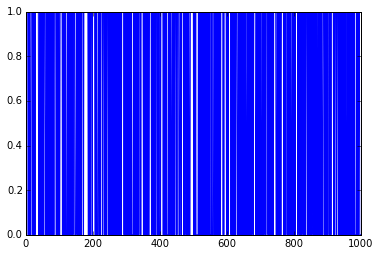

In [6]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

%matplotlib inline
a = pm.Categorical('a',np.array([.4,.6]))
model = pm.Model([a])
mcmc = pm.MCMC(model)
mcmc.sample(2000,1000,1)
plt.plot(mcmc.trace('a')[:]);

In [8]:
#Step 1: Pick the path to the data
pathToData = '../../cgi-data/';

In [3]:
#Step 2: Illustrate the baby-names system, if you have not yet downloaded and populated the 
#various databases, and files, this won't work.
#import web_helper_functions as whf
#import sqlite3 as lite
#con = lite.connect(pathToData + 'psych.db')
#whf.add_question(con, 999999, 'where', dataitem, detail);
#TODO: Bit of a hassle.

NameError: name 'userid' is not defined

In [19]:
pathToData = '../../cgi-data/';
import other_helper_functions as ohf
import sqlite3 as lite

con = lite.connect(pathToData + 'psych.db')
output, model, mcmc, features, facts = ohf.do_inference(con, 116, ['factor_age'])

In [20]:
np.log(facts['where']['probabilities']),facts['where']['OAs']

(array([-13.51323382, -13.44953694, -13.36787918, -12.83789377,
        -12.52151607, -12.42566707, -11.87242534, -11.79676719, -11.51674276]),
 [u'E00172496',
  u'E00041308',
  u'E00040877',
  u'E00041361',
  u'E00041359',
  u'E00039868',
  u'E00039864',
  u'E00040875',
  u'E00172433',
  'K04000001'])

28 33


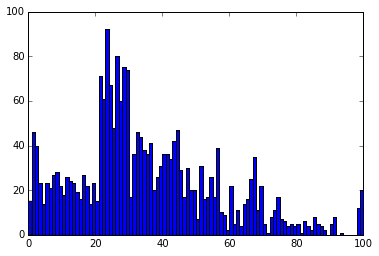

In [26]:
temp = mcmc.trace('factor_age')[:]
plt.hist(temp,max(temp));
print temp[len(temp)*0.45], temp[len(temp)*0.55]

0.193777777778 0 Christian
*
0.0306666666667 1 Buddhist
0.0222222222222 2 Hindu
0.0306666666667 3 Jewish
0.584 4 Muslim
*
0.0262222222222 5 Sikh
0.0262222222222 6 religious (but I do't know which)
0.0862222222222 7 of no religion
['Christian', 'Muslim']
Christian or Muslim


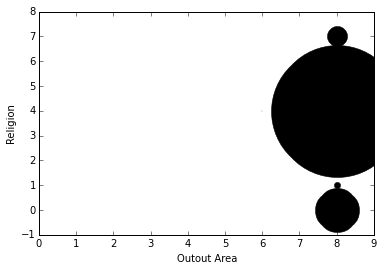

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
rel = mcmc.trace('religion')[:]
age = mcmc.trace('factor_age')[:]
gend = mcmc.trace('factor_gender')[:]
oa = mcmc.trace('oa')[:]
#plt.plot(mcmc.trace('oa')[:],mcmc.trace('factor_age')[:])
#plt.plot(rel[::20],oa[::20],'x')

import numpy as np
x = np.zeros((9,8))
for oas in range(9):
    for rels in range(8):
        x = sum([o and r for o,r in zip(oa==oas,rel==rels)])
        plt.plot(oas,rels,'ko',markersize=x*0.1)
plt.xlabel('Outout Area')
plt.ylabel('Religion')
plt.ylim([-1,8])
plt.xlim([0,9])
#plt.hist(mcmc.trace('religion')[:],80);

rel = mcmc.trace('religion')[:]
from answer_census import CensusAnswer
listOfReligions = []
for i,r in enumerate(CensusAnswer.religion_text):
    print np.mean(rel==i),i,r
    if (np.mean(rel==i)>0.17):
        print "*"
        listOfReligions.append(r)
print listOfReligions
if (len(listOfReligions)>1):
    msg = ', '.join(listOfReligions[:-1]) + ' or ' + listOfReligions[-1]
else:
    msg = listOfReligions[0]
    
print msg
#for r in mcmc.trace('religion')[:]
    
        

In [2]:
import numpy as np
facts = {}
facts['where'] = {'probabilities': np.array([  2.61969505e-37,   2.66707403e-31,   2.32066595e-25,
         5.02402437e-22,   3.03085406e-10,   2.34257820e-08,
         2.38612466e-06,   2.79728521e-06,   4.55157580e-06]), 'OAs': [u'E00172434', u'E00039867', u'E00039868', u'E00039864', u'E00039869', u'E00039865', u'E00039863', u'E00040875', u'E00172433', 'K04000001']}

from answer_census import CensusAnswer
a = CensusAnswer('','','','')
a.calc_probs_religion(facts)

In [12]:
a.probs[0,0,0,:,0]

array([ 0.8,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.8])

In [2]:
from answer_census import CensusAnswer
data = [[0]]
CensusAnswer.getReligionDist('E00172434',data)

In [21]:
import numpy as np
data[0][0][4]

array([ 0.30882353,  0.01470588,  0.01470588,  0.01470588,  0.01470588,
        0.01470588,  0.01470588,  0.60294118])

In [5]:

#df.ix['Males~Age 50 to 64~Jewish']
import numpy as np
ages = [0,16,25,35,50,65,75]
ages_start = [str(a) for a in ages]
ages_end = ['to '+str(a-1) for a in ages[1:]]
ages_end.append('and over')
religions = ['Christian','Buddhist','Hindu','Jewish','Muslim','Sikh','Other religion','No religion']
probs = np.empty((2,len(ages),len(religions)))
for genderi,gender in enumerate(['Males','Females']):
    for agei,(start,end) in enumerate(zip(ages_start,ages_end)):
        for religioni,religion in enumerate(religions):
            label = "%s~Age %s %s~%s" % (gender,start,end,religion)
       #     print "%s=%d" % (label,df.ix[label])
            probs[genderi,agei,religioni] = df[label]

#Normalise, with 0.1 people added to each category to smooth
for x in range(probs.shape[0]):
    for y in range(probs.shape[1]):
        probs[x,y,:] += 0.1
        probs[x,y,:] = probs[x,y,:] / np.sum(probs[x,y,:])
#Note, normalised so that Sum(p|..)=1 over all the religions (we are interested in p(religion|age,gender,oa))

In [6]:
probs

array([[[ 0.39285714,  0.03571429,  0.03571429,  0.03571429,  0.03571429,
          0.03571429,  0.03571429,  0.39285714],
        [ 0.19444444,  0.10185185,  0.00925926,  0.00925926,  0.00925926,
          0.00925926,  0.00925926,  0.65740741],
        [ 0.39139344,  0.00204918,  0.00204918,  0.00204918,  0.02254098,
          0.00204918,  0.00204918,  0.57581967],
        [ 0.30357143,  0.00595238,  0.00595238,  0.00595238,  0.06547619,
          0.00595238,  0.00595238,  0.60119048],
        [ 0.30882353,  0.01470588,  0.01470588,  0.01470588,  0.01470588,
          0.01470588,  0.01470588,  0.60294118],
        [ 0.125     ,  0.125     ,  0.125     ,  0.125     ,  0.125     ,
          0.125     ,  0.125     ,  0.125     ],
        [ 0.125     ,  0.125     ,  0.125     ,  0.125     ,  0.125     ,
          0.125     ,  0.125     ,  0.125     ]],

       [[ 0.55263158,  0.02631579,  0.02631579,  0.02631579,  0.02631579,
          0.02631579,  0.02631579,  0.28947368],
        [ 0.56

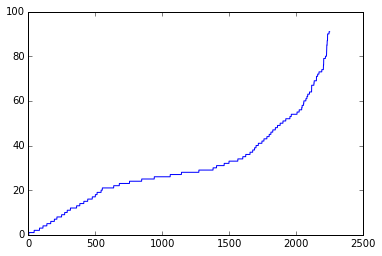

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(mcmc.trace('factor_age')[:]);
#plt.xlim([0,100])

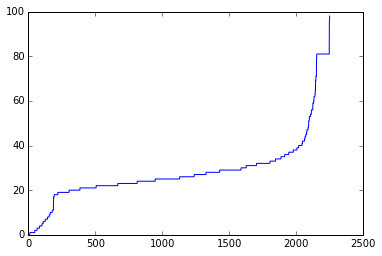

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(mcmc.trace('factor_age')[:])

<matplotlib.contour.QuadContourSet instance at 0x7febdc131560>

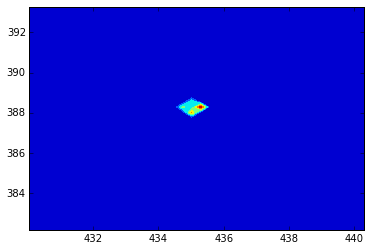

In [6]:
X = facts['where']['debug']['X']
Y = facts['where']['debug']['Y']
Z = facts['where']['debug']['Z']
plt.contourf(X,Y,Z)

In [2]:
pathToData = '../../cgi-data/';
import other_helper_functions as ohf
import sqlite3 as lite

con = lite.connect(pathToData + 'psych.db')
from answer_where import WhereAnswer
WhereAnswer.init_db()
qas = [];
qas.append({'dataset':'where','dataitem':'incity','detail':'{"latitude": 53.37, "city": "Sheffield", "longitude": -1.495}','answer':'{"latitude": 53.37, "city": "Sheffield", "response": "yes", "longitude": -1.495, "know": true}'})
qas.append({'dataset':'where','dataitem':'landmark','detail':'262077485','answer':'yes'})
qas.append({'dataset':'where','dataitem':'landmarkdist','detail':'262077485','answer':'4.2'})
qas.append({'dataset':'where','dataitem':'landmark','detail':'1228018412','answer':'yes'})
qas.append({'dataset':'where','dataitem':'landmarkdist','detail':'1228018412','answer':'4.2'})
qas.append({'dataset':'where','dataitem':'landmark','detail':'1144275513','answer':'no'})
qas = []

a,b = WhereAnswer.pick_question(qas)

'{"latitude": 53.37, "city": "Sheffield", "longitude": -1.495}'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
done = np.array([[432481.664593,382013.663893],[435196.212266,387804.801841]])
coords = np.array([[it.east,it.north] for it in items])
plt.plot(coords[:,0],coords[:,1],'x')
plt.plot(done[:,0],done[:,1],'o')
for i in range(2):
    circle1=plt.Circle((done[i][0],done[i][1]),4200,fill=False)
    plt.gcf().gca().add_artist(circle1)
plt.axes().set_aspect('equal', 'datalim')
for c,e in zip(coords,entropy):
    plt.axes().annotate('%0.2f' % e,c)

NameError: name 'items' is not defined

<matplotlib.contour.QuadContourSet instance at 0x7fd4bb20ad88>

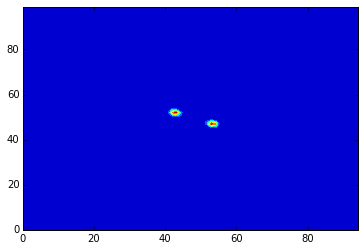

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.contourf(p)